In [1]:
%pip install -q numpy scikit-learn nltk tensorflow huggingface-hub matplotlib

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from tensorflow.keras import layers, models
from urllib.parse import urlparse
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [3]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
#loading data
df = pd.read_csv("hf://datasets/zefang-liu/phishing-email-dataset/Phishing_Email.csv")

In [5]:
df.head()

,Unnamed: 0,Email Text,Email Type
0,0,"re : 6 . 1100 , disc : uniformitarianism , re ...",Safe Email
1,1,the other side of * galicismos * * galicismo *...,Safe Email
2,2,re : equistar deal tickets are you still avail...,Safe Email
3,3,\nHello I am your hot lil horny toy.\n I am...,Phishing Email
4,4,software at incredibly low prices ( 86 % lower...,Phishing Email


In [6]:
df.columns

Index(['Unnamed: 0', 'Email Text', 'Email Type'], dtype='object')

In [7]:
df['Email Type'].nunique()

2

In [8]:
df.isnull().sum()

Unnamed: 0     0
Email Text    16
Email Type     0
dtype: int64

In [9]:
df=df.dropna()

In [10]:
#convertin the email contents to lower case
df['Email Text'] = df['Email Text'].str.lower()

In [11]:
#reomving special characters
df['Email Text'] = df['Email Text'].apply(lambda x: re.sub(r'\W', ' ', x))

In [12]:
# removing extra spaces
df['Email Text'] = df['Email Text'].str.replace(r'\s+', ' ', regex=True).str.strip() 

In [13]:
# Label encoding
df['Email Type'] = df['Email Type'].map({'Safe Email': 0, 'Phishing Email': 1})

In [14]:
# Tokenization and stop word removal
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def tokenize_and_remove_stopwords(text):
    # Tokenize
    tokens = word_tokenize(text)
    # Remove stop words and lemmatize
    filtered_lemmas = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(filtered_lemmas)

# Apply the function to the email column
df['Email Text'] = df['Email Text'].apply(tokenize_and_remove_stopwords)

# Display the updated DataFrame
print(df['Email Text'])

0        6 1100 disc uniformitarianism 1086 sex lang di...
1        side galicismos galicismo spanish term name im...
2        equistar deal ticket still available assist ro...
3        hello hot lil horny toy one dream open minded ...
4        software incredibly low price 86 lower drapery...
                               ...                        
18645    date lonely housewife always wanted date lonel...
18646    request submitted access request anita dupont ...
18647    important prc mtg hi dorn john discovered rece...
18648    press clipping letter californian utility plea...
18649                                                empty
Name: Email Text, Length: 18634, dtype: object


In [15]:
# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(df['Email Text'], df['Email Type'], test_size=0.2, random_state=42)

In [16]:
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [17]:
X_train_tfidf.shape

(14907, 140839)

In [18]:
# Build model
model = models.Sequential()
model.add(layers.Input(shape=(X_train_tfidf.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))



# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [19]:
# Train model
history = model.fit(X_train_tfidf, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 90s 238ms/step - accuracy: 0.8351 - loss: 0.4085 - val_accuracy: 0.9722 - val_loss: 0.0824
Epoch 2/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 89s 238ms/step - accuracy: 0.9830 - loss: 0.0532 - val_accuracy: 0.9748 - val_loss: 0.0624
Epoch 3/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 85s 229ms/step - accuracy: 0.9878 - loss: 0.0304 - val_accuracy: 0.9769 - val_loss: 0.0543
Epoch 4/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 146s 239ms/step - accuracy: 0.9876 - loss: 0.0255 - val_accuracy: 0.9765 - val_loss: 0.0525
Epoch 5/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 144s 244ms/step - accuracy: 0.9882 - loss: 0.0209 - val_accuracy: 0.9759 - val_loss: 0.0534
Epoch 6/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 92s 247ms/step - accuracy: 0.9893 - loss: 0.0213 - val_accuracy: 0.9759 - val_loss: 0.0508
Epoch 7/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 90s 241ms/step - accuracy: 0.9882 - loss: 0.0211 - val_accuracy: 0.9765 - val_loss: 0.0532
Epoch 8/10
373/373 ━━━━━━━━━━━━━━━━━━━━ 142s 240ms/step - accuracy: 0.9903 - loss

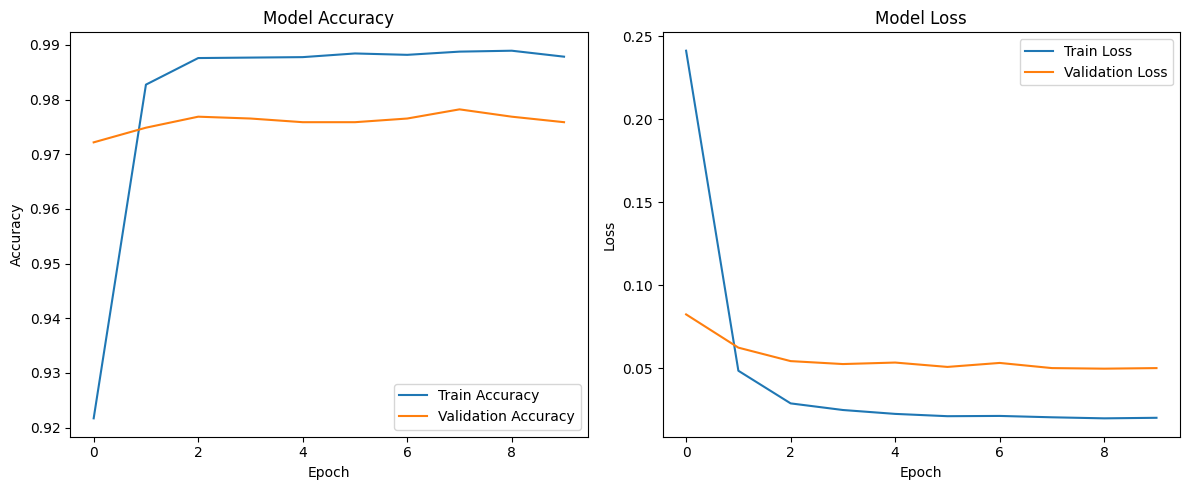

In [20]:
import matplotlib.pyplot as plt
# Plotting the training history
def plot_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='best')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='best')

    plt.tight_layout()
    plt.show()

plot_history(history)

In [21]:
# Evaluate model
loss, accuracy = model.evaluate(X_test_tfidf, y_test)

117/117 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.9754 - loss: 0.0568


In [24]:
# Save the model
model.save('phishing_email_detection.h5')